In [1]:
# !pip install numpy
# !pip install pandas
# !pip install scikit-learn
# !pip install matplotlib

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Housing.csv')
print(df.head())
# df.describe

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [4]:
selection = ["area", "bedrooms", "bathrooms", "price"]
df = df[selection]

print(df.head())

   area  bedrooms  bathrooms     price
0  7420         4          2  13300000
1  8960         4          4  12250000
2  9960         3          2  12250000
3  7500         4          2  12215000
4  7420         4          1  11410000


In [5]:
null_values = df[selection].isnull().sum()
print(null_values)

area         0
bedrooms     0
bathrooms    0
price        0
dtype: int64


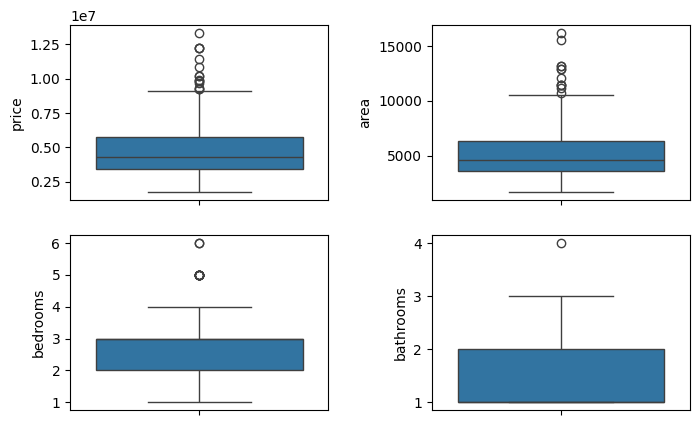

In [6]:
fig, axs = plt.subplots(2,2, figsize = (8,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[1,0])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,1])
plt.subplots_adjust(wspace=0.4)

In [7]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return column[(column >= Q1 - 1.5*IQR) & (column <= Q3 + 1.5*IQR)]

df = df.apply(remove_outliers, axis=0)

In [8]:
null_values = df.isnull().sum()
print(null_values)

df = df.dropna()
df.reset_index(drop=True, inplace=True)

area         12
bedrooms     12
bathrooms     1
price        15
dtype: int64


In [9]:
null_values = df.isnull().sum()
print(null_values)

area         0
bedrooms     0
bathrooms    0
price        0
dtype: int64


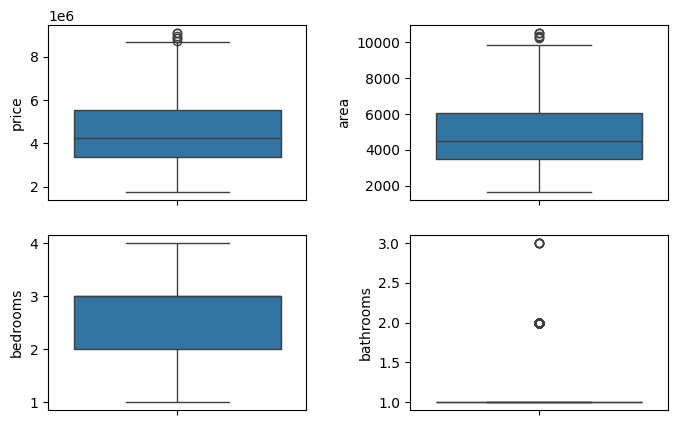

In [10]:
fig, axs = plt.subplots(2,2, figsize = (8,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[1,0])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,1])
plt.subplots_adjust(wspace=0.4)

In [11]:
X = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# print(type(X_test_scaled))

In [14]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_train_scaled_df.head()

,area,bedrooms,bathrooms
466,0.088136,0.666667,0.0
75,0.536723,0.666667,0.0
282,0.229379,0.666667,0.5
235,0.138983,0.666667,0.0
84,0.429379,1.000000,0.5


In [15]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
X_test_scaled_df.head()

,area,bedrooms,bathrooms
498,0.084746,0.666667,0.0
231,0.210169,0.666667,0.0
188,0.357627,0.333333,0.0
31,0.299435,0.666667,0.5
157,0.152542,0.666667,0.5


In [16]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test_scaled)

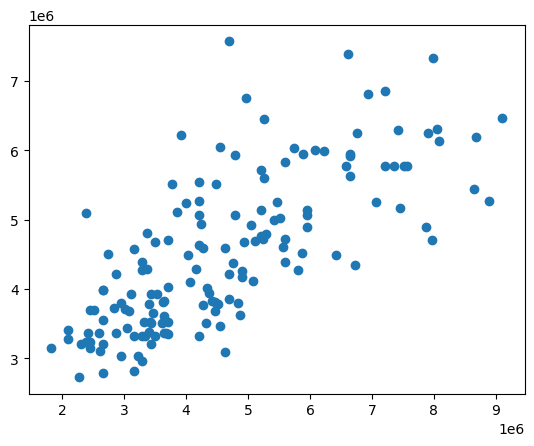

In [18]:
plt.scatter(y_test,y_pred)

In [19]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 1321674133632.3381
Root Mean Squared Error: 1149640.8715909235
R^2 Score: 0.5317528474449689
